<a href="https://colab.research.google.com/github/SiriBatchu/Neural-Networks/blob/main/Using_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

# Custom Dataset using PyTorch's Dataset class
class NonLinearDataset(Dataset):
    def __init__(self, n_samples=1000):
        X1 = np.random.uniform(-5, 5, n_samples)
        X2 = np.random.uniform(-5, 5, n_samples)
        X3 = np.random.uniform(-5, 5, n_samples)

        # Non-linear function with 3 variables
        y = (2 * np.sin(X1) + 0.5 * X2**2 + 0.3 * X3**3 +
             np.cos(X1 * X2) + np.random.normal(0, 0.2, n_samples))

        self.X = torch.FloatTensor(np.column_stack((X1, X2, X3)))
        self.y = torch.FloatTensor(y.reshape(-1, 1))

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [ ]:
# Neural Network using PyTorch's nn.Module
class NonLinearRegressor(nn.Module):
    def __init__(self):
        super(NonLinearRegressor, self).__init__()

        # Using PyTorch's built-in layers
        self.network = nn.Sequential(
            nn.Linear(3, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.2),

            nn.Linear(64, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.Dropout(0.2),

            nn.Linear(32, 16),
            nn.ReLU(),
            nn.BatchNorm1d(16),
            nn.Dropout(0.2),

            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.network(x)

In [ ]:
def train_model():
    # Create datasets using PyTorch's Dataset class
    train_dataset = NonLinearDataset(1000)
    val_dataset = NonLinearDataset(200)

    # Create data loaders using PyTorch's DataLoader
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32)

    # Initialize model using PyTorch's nn.Module
    model = NonLinearRegressor()

    # Use PyTorch's built-in loss function
    criterion = nn.MSELoss()

    # Use PyTorch's built-in optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Use PyTorch's learning rate scheduler
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=10)

    train_losses = []
    val_losses = []

    # Training loop
    epochs = 1000
    for epoch in range(epochs):
        # Training phase
        model.train()  # Set PyTorch model to training mode
        train_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()  # PyTorch gradient zeroing

            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)

            # PyTorch's autograd and backward pass
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        # Validation phase
        model.eval()  # Set PyTorch model to evaluation mode
        val_loss = 0
        with torch.no_grad():  # PyTorch's gradient tracking disable
            for X_batch, y_batch in val_loader:
                outputs = model(X_batch)
                val_loss += criterion(outputs, y_batch).item()

        train_loss /= len(train_loader)
        val_loss /= len(val_loader)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

        # Update learning rate using PyTorch scheduler
        scheduler.step(val_loss)

        if epoch % 100 == 0:
            print(f'Epoch {epoch}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    return model, train_losses, val_losses


In [ ]:

def plot_results(model, train_losses, val_losses):
    # Create test data
    test_dataset = NonLinearDataset(200)

    fig = plt.figure(figsize=(20, 5))

    # Plot losses
    ax1 = fig.add_subplot(131)
    ax1.plot(train_losses, label='Train Loss')
    ax1.plot(val_losses, label='Val Loss')
    ax1.set_title('Training and Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_yscale('log')
    ax1.legend()

    # 4D scatter plot
    ax2 = fig.add_subplot(132, projection='3d')

    with torch.no_grad():
        y_pred = model(test_dataset.X)

    scatter = ax2.scatter(test_dataset.X[:, 0],
                         test_dataset.X[:, 1],
                         test_dataset.X[:, 2],
                         c=y_pred.numpy(),
                         cmap='viridis')
    plt.colorbar(scatter, label='Predicted Value')

    ax2.set_xlabel('X1')
    ax2.set_ylabel('X2')
    ax2.set_zlabel('X3')
    ax2.set_title('4D Scatter Plot\n(Color represents predicted value)')

    # Actual vs Predicted
    ax3 = fig.add_subplot(133)
    ax3.scatter(test_dataset.y.numpy(), y_pred.numpy(), alpha=0.5)
    ax3.plot([test_dataset.y.min(), test_dataset.y.max()],
             [test_dataset.y.min(), test_dataset.y.max()],
             'r--')
    ax3.set_xlabel('Actual Values')
    ax3.set_ylabel('Predicted Values')
    ax3.set_title('Actual vs Predicted Values')

    plt.tight_layout()
    plt.show()

Epoch 0: Train Loss: 208.0874, Val Loss: 159.4765
Epoch 100: Train Loss: 29.7710, Val Loss: 2.7876
Epoch 200: Train Loss: 27.7264, Val Loss: 3.2810
Epoch 300: Train Loss: 23.4665, Val Loss: 2.5257
Epoch 400: Train Loss: 25.0481, Val Loss: 4.6439
Epoch 500: Train Loss: 30.3816, Val Loss: 4.9457
Epoch 600: Train Loss: 29.8334, Val Loss: 2.2454
Epoch 700: Train Loss: 23.4446, Val Loss: 3.3453
Epoch 800: Train Loss: 27.6653, Val Loss: 3.4642
Epoch 900: Train Loss: 22.0743, Val Loss: 4.6446


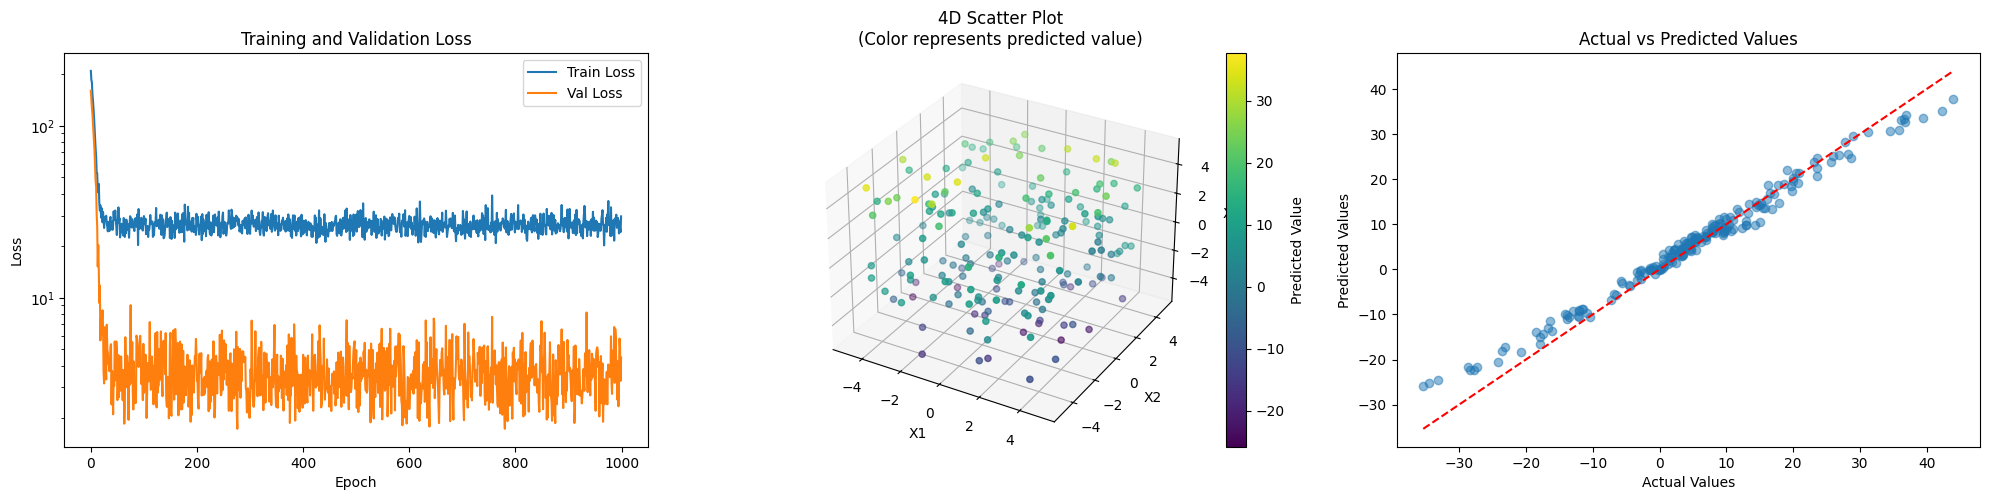


Test Predictions:
Input: (-4, -4, -4)
Prediction: -7.686
Actual: -10.644

Input: (-2, -2, -2)
Prediction: -0.565
Actual: -2.872

Input: (0, 0, 0)
Prediction: 0.724
Actual: 1.000

Input: (2, 2, 2)
Prediction: 6.041
Actual: 5.565

Input: (4, 4, 4)
Prediction: 24.774
Actual: 24.729



In [ ]:
def main():
    # Train model
    model, train_losses, val_losses = train_model()

    # Plot results
    plot_results(model, train_losses, val_losses)

    # Test predictions
    @torch.no_grad()
    def test_model(x1, x2, x3):
        x = torch.FloatTensor([[x1, x2, x3]])
        return model(x).item()

    # Example predictions
    test_points = [
        (-4, -4, -4),
        (-2, -2, -2),
        (0, 0, 0),
        (2, 2, 2),
        (4, 4, 4)
    ]

    print("\nTest Predictions:")
    for x1, x2, x3 in test_points:
        pred = test_model(x1, x2, x3)
        actual = 2 * np.sin(x1) + 0.5 * x2**2 + 0.3 * x3**3 + np.cos(x1 * x2)
        print(f"Input: ({x1}, {x2}, {x3})")
        print(f"Prediction: {pred:.3f}")
        print(f"Actual: {actual:.3f}\n")

if __name__ == "__main__":
    main()